# EDA Energy

### Dataset (https://www.kaggle.com/c/ashrae-energy-prediction/data)

__Variable description__
* building_id - Foreign key for the building metadata.
* meter - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, 3: hotwater}. Not every building has all meter types.
* timestamp - When the measurement was taken
* meter_reading - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed here, the site 0 electric meter readings are in kBTU.

* site_id - Foreign key for the weather files.
* primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
* square_feet - Gross floor area of the building
* year_built - Year building was opened
* floor_count - Number of floors of the building

* air_temperature - Degrees Celsius
* cloud_coverage - Portion of the sky covered in clouds, in oktas
* dew_temperature - Degrees Celsius
* precip_depth_1_hr - Millimeters
* sea_level_pressure - Millibar/hectopascals
* wind_direction - Compass direction (0-360)
* wind_speed - Meters per second

Reference<br>
https://medium.com/towards-artificial-intelligence/ashrae-great-energy-prediction-challenge-cefab05e4f2

In [1]:
# Include neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# #Map drive to access train_building_weather_9-2.csv
# from google.colab import drive
# import os
# drive.mount('/content/drive/')
# os.chdir('/content/drive/My Drive/CP-DSAI/')

In [3]:
data1 = pd.read_csv('train_building_weather_9-2.csv')
data1.info()
#What's wrong?
#1) building_id, meter, site_id are int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679325 entries, 0 to 2679324
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   timestamp           object 
 2   building_id         int64  
 3   meter               int64  
 4   meter_reading       float64
 5   site_id             int64  
 6   primary_use         object 
 7   square_feet         int64  
 8   year_built          float64
 9   floor_count         float64
 10  air_temperature     float64
 11  cloud_coverage      float64
 12  dew_temperature     float64
 13  precip_depth_1_hr   float64
 14  sea_level_pressure  float64
 15  wind_direction      float64
 16  wind_speed          float64
dtypes: float64(10), int64(5), object(2)
memory usage: 347.5+ MB


In [4]:
data1.head(5)

,Unnamed: 0,timestamp,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,874,0,0.0,9,Office,181805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016-01-01 00:00:00,874,1,0.0,9,Office,181805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2016-01-01 00:00:00,875,0,0.0,9,Lodging/residential,177708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2016-01-01 00:00:00,875,1,0.0,9,Lodging/residential,177708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2016-01-01 00:00:00,875,2,0.0,9,Lodging/residential,177708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#convert timestamp from object into timestamp datatype
data = pd.read_csv('train_building_weather_9-2.csv', parse_dates = ['timestamp'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679325 entries, 0 to 2679324
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   timestamp           datetime64[ns]
 2   building_id         int64         
 3   meter               int64         
 4   meter_reading       float64       
 5   site_id             int64         
 6   primary_use         object        
 7   square_feet         int64         
 8   year_built          float64       
 9   floor_count         float64       
 10  air_temperature     float64       
 11  cloud_coverage      float64       
 12  dew_temperature     float64       
 13  precip_depth_1_hr   float64       
 14  sea_level_pressure  float64       
 15  wind_direction      float64       
 16  wind_speed          float64       
dtypes: datetime64[ns](1), float64(10), int64(5), object(1)
memory usage: 347.5+ MB


 ### From the following data, can you think of questions on these data?

Explore data using the following methods<br>

- head or tail
- shape
- columns
- describe

In [8]:
data.head()

,Unnamed: 0,timestamp,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01,874,0,0.0,9,Office,181805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016-01-01,874,1,0.0,9,Office,181805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2016-01-01,875,0,0.0,9,Lodging/residential,177708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2016-01-01,875,1,0.0,9,Lodging/residential,177708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2016-01-01,875,2,0.0,9,Lodging/residential,177708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#delete the first column: it is a row index from the csv file.
data.drop(data.columns[0], axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679325 entries, 0 to 2679324
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   building_id         int64         
 2   meter               int64         
 3   meter_reading       float64       
 4   site_id             int64         
 5   primary_use         object        
 6   square_feet         int64         
 7   year_built          float64       
 8   floor_count         float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
dtypes: datetime64[ns](1), float64(10), int64(4), object(1)
memory usage: 327.1+ MB


In [11]:
#Check a number of rows and columns
print(data.shape)
print(list(data.columns))
#Are columns identical to the description?

(2679325, 16)
['timestamp', 'building_id', 'meter', 'meter_reading', 'site_id', 'primary_use', 'square_feet', 'year_built', 'floor_count', 'air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed']


In [13]:
#Check data types
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679325 entries, 0 to 2679324
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   building_id         int64         
 2   meter               int64         
 3   meter_reading       float64       
 4   site_id             int64         
 5   primary_use         object        
 6   square_feet         int64         
 7   year_built          float64       
 8   floor_count         float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
dtypes: datetime64[ns](1), float64(10), int64(4), object(1)
memory usage: 327.1+ MB


building_id, meter, and site_id are not number but ID. They should be Category data (nominal). Need to change from int64 into Category.

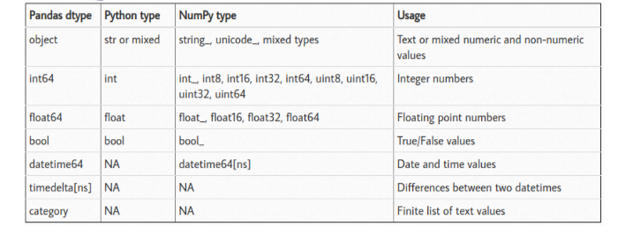

In [14]:
#Convert to category data type
#meter, building_id, site_id
data['meter'] = data['meter'].astype('category')
data['building_id'] = data['building_id'].astype('category')
data['site_id'] = data['site_id'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679325 entries, 0 to 2679324
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   building_id         category      
 2   meter               category      
 3   meter_reading       float64       
 4   site_id             category      
 5   primary_use         object        
 6   square_feet         int64         
 7   year_built          float64       
 8   floor_count         float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
dtypes: category(3), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 273.4+ MB


In [15]:
data['timestamp'].dtypes

dtype('<M8[ns]')

In [16]:
#Check duplicated row
#By setting keep on False, all duplicates are True.
data.duplicated(keep=False).sum()

3

In [17]:
#Show duplicated row
data[data.duplicated(keep=False)]

,timestamp,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01,874,0,0.0,9,Office,181805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2679323,2016-01-01,874,0,0.0,9,Office,181805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2679324,2016-01-01,874,0,0.0,9,Office,181805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#drop the duplicate row
data.drop_duplicates(inplace=True)

In [19]:
#no duplicate row
data.duplicated(keep=False).sum()

0

In [20]:
# show basic statistic
data.describe()
#No meter, building_id, site_id

,timestamp,meter_reading,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2679323,2.679323e+06,2.679323e+06,0.0,0.0,2.676575e+06,1.623360e+06,2.675965e+06,2.675968e+06,2.605099e+06,1.897513e+06,2.648466e+06
mean,2016-07-02 03:34:23.761927936,2.630694e+02,1.539606e+05,NaN,NaN,2.137184e+01,6.117078e-01,1.461865e+01,7.491039e-01,1.016627e+03,1.166630e+02,2.083484e+00
min,2016-01-01 00:00:00,0.000000e+00,5.682000e+03,NaN,NaN,-5.000000e+00,0.000000e+00,-1.330000e+01,-1.000000e+00,9.995000e+02,0.000000e+00,0.000000e+00
25%,2016-04-01 18:00:00,3.660000e+01,5.255900e+04,NaN,NaN,1.610000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.012800e+03,0.000000e+00,1.500000e+00
50%,2016-07-02 05:00:00,1.189500e+02,1.116230e+05,NaN,NaN,2.220000e+01,0.000000e+00,1.720000e+01,0.000000e+00,1.015800e+03,1.200000e+02,2.100000e+00
75%,2016-10-01 14:00:00,3.080500e+02,2.160500e+05,NaN,NaN,2.670000e+01,0.000000e+00,2.170000e+01,0.000000e+00,1.020000e+03,1.800000e+02,3.100000e+00
max,2016-12-31 23:00:00,2.999640e+05,7.456710e+05,NaN,NaN,3.940000e+01,9.000000e+00,2.610000e+01,2.030000e+02,1.041600e+03,3.600000e+02,9.300000e+00
std,NaN,5.723204e+02,1.334998e+05,NaN,NaN,7.985553e+00,1.338540e+00,8.500965e+00,7.235808e+00,6.062629e+00,1.170672e+02,1.519659e+00


In [21]:
#To select pandas categorical columns, use 'category'
#The top is the most common value.
#The freq is the most common value’s frequency.
data.describe(include=['category'])

,building_id,meter,site_id
count,2679323,2679323,2679323
unique,124,3,1
top,954,0,9
freq,26349,1068748,2679323


In [22]:
#Describing a timestamp Series.
data['timestamp'].describe()

count                          2679323
mean     2016-07-02 03:34:23.761927936
min                2016-01-01 00:00:00
25%                2016-04-01 18:00:00
50%                2016-07-02 05:00:00
75%                2016-10-01 14:00:00
max                2016-12-31 23:00:00
Name: timestamp, dtype: object

In [23]:
#Including only string columns in a DataFrame description.

#data.describe(include=['O'])
#or
data.describe(include=[object])

,primary_use
count,2679323
unique,6
top,Education
freq,1499603


### Check values in each column and handle NaN.

In [24]:
# Attempt to find number of null for each columns
data.isnull().sum()

timestamp                   0
building_id                 0
meter                       0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
year_built            2679323
floor_count           2679323
air_temperature          2748
cloud_coverage        1055963
dew_temperature          3358
precip_depth_1_hr        3355
sea_level_pressure      74224
wind_direction         781810
wind_speed              30857
dtype: int64

In [25]:
#show unique values in primary_use column
#data['primary_use'].unique()
#or
data['primary_use'].value_counts()

primary_use
Education                        1499603
Lodging/residential               391129
Entertainment/public assembly     385165
Office                            306988
Public services                    52615
Services                           43823
Name: count, dtype: int64

C:\Users\eraco\AppData\Local\Temp\ipykernel_23124\533028765.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")


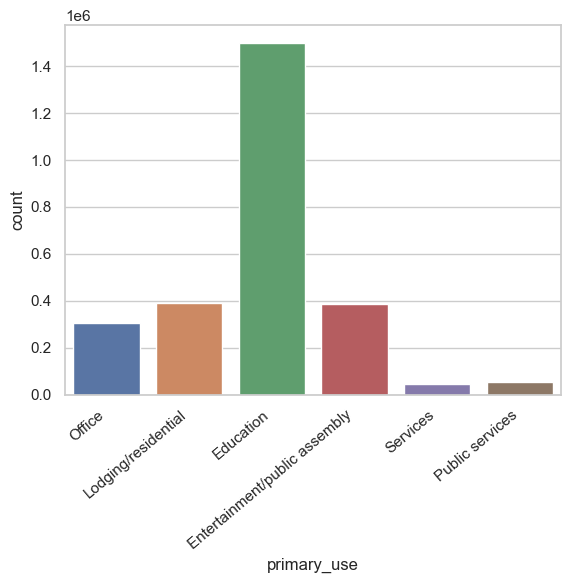

In [26]:
#Show the number of observations in each categorical bin using bars.
sns.set(style="whitegrid")
g=sns.countplot(x='primary_use', hue='primary_use', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [28]:
#show unique values in building_id column
data['building_id'].value_counts()
data['building_id'].unique()

[874, 875, 876, 877, 878, ..., 993, 994, 995, 996, 997]
Length: 124
Categories (124, int64): [874, 875, 876, 877, ..., 994, 995, 996, 997]

In [29]:
#{0: electricity, 1: chilledwater, 2: steam, 3: hotwater}.
#show unique values in meter column
data['meter'].value_counts()

meter
0    1068748
1     833113
2     777462
Name: count, dtype: int64

In [30]:
#show unique values in site_id column
data['site_id'].value_counts()

site_id
9    2679323
Name: count, dtype: int64

### Remove useless columns

In [31]:
#find columns with more than 90% data as null
#cols_to_delete
#Try
cols_to_delete = data.columns[data.isnull().sum()/len(data) > 0.90]
cols_to_delete

Index(['year_built', 'floor_count'], dtype='object')

In [32]:
#Exercise
#drop columns in the cols_to_delete
data.drop(cols_to_delete, axis=1, inplace=True)


In [33]:
#Since site_id has only 1 value (9), this column can be deleted.

data.drop(['site_id'],axis=1, inplace=True)

In [34]:
#show columns
data.columns
#print(len(data.columns))

Index(['timestamp', 'building_id', 'meter', 'meter_reading', 'primary_use',
       'square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')

In [37]:
# Attempt to find a number of not-null for precip_depth_1_hr
data.precip_depth_1_hr.notnull().sum()

2675968

In [38]:
# extract only the row with precip_depth_1_hr columns is null
m = data[data.precip_depth_1_hr.isnull()]
m.shape

(3355, 13)

### univariate data analysis

In [39]:
# Find summation for each meter type
data.groupby(['meter']).sum(numeric_only = True)

C:\Users\eraco\AppData\Local\Temp\ipykernel_23124\661483766.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['meter']).sum(numeric_only = True)


,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter,,,,,,,,,
0,1.923678e+08,155866863739,22816287.8,396204.0,15602839.6,800466.0,1.056402e+09,88309920.0,2201253.5
1,3.955166e+08,133296168934,17783007.2,308613.0,12159056.0,622499.0,8.235004e+08,68850390.0,1715952.4
2,1.169635e+08,123347019230,16604031.0,288205.0,11357100.4,581613.0,7.685120e+08,64209170.0,1600830.8


In [40]:
# Find the average for each meter type
data.groupby(['primary_use']).mean(numeric_only = True)

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
primary_use,,,,,,,,,
Education,292.515698,150734.880030,21.369107,0.611577,14.615865,0.749019,1016.627321,116.674824,2.083638
Entertainment/public assembly,309.884465,197272.571763,21.374755,0.611458,14.620396,0.749572,1016.624230,116.681698,2.083912
Lodging/residential,207.587695,130317.594113,21.384440,0.612545,14.633296,0.747239,1016.628595,116.590638,2.082423
Office,146.003855,94541.318928,21.367093,0.611511,14.613059,0.750978,1016.628056,116.666053,2.083537
Public services,316.750109,278778.744331,21.365933,0.611822,14.612647,0.751356,1016.628594,116.677312,2.083524
Services,94.768729,361068.370171,21.367493,0.612139,14.614262,0.748698,1016.628837,116.698679,2.083520


In [41]:
#Determine the summation based on meter and timestamp
data.groupby([data['timestamp'],'meter']).sum(numeric_only = True)

C:\Users\eraco\AppData\Local\Temp\ipykernel_23124\2485748058.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([data['timestamp'],'meter']).sum(numeric_only = True)


meter_reading  square_feet  air_temperature  \
timestamp           meter                                                
2016-01-01 00:00:00 0             0.0000     17785270              0.0   
                    1             0.0000     15200062              0.0   
                    2             0.0000     14072782              0.0   
2016-01-01 01:00:00 0         15878.4990     17513839           1190.0   
                    1         11168.9886     15200062            950.0   
...                                  ...          ...              ...   
2016-12-31 22:00:00 1         24253.3204     15200062           2375.0   
                    2         13426.1000     14072782           2225.0   
2016-12-31 23:00:00 0         16789.0810     17785270           2976.8   
                    1         22827.3877     15200062           2318.0   
                    2         13307.1500     14031541           2147.2   

                           cloud_coverage  dew_temperature  precip_depth_1_hr  \
timestamp           meter                                                       
2016-01-01 00:00:00 0                 0.0              0.0                0.0   
                    1                 0.0              0.0                0.0   
                    2                 0.0              0.0                0.0   
2016-01-01 01:00:00 0                 0.0            464.1                0.0   
                    1                 0.0            370.5                0.0   
...                                   ...              ...                ...   
2016-12-31 22:00:00 1                 0.0           1482.0                0.0   
                    2                 0.0           1388.4                0.0   
2016-12-31 23:00:00 0                 0.0           1964.2                0.0   
                    1                 0.0           1529.5                0.0   
                    2                 0.0           1416.8                0.0   

                           sea_level_pressure  wind_direction  wind_speed  
timestamp           meter                                                  
2016-01-01 00:00:00 0                     0.0             0.0         0.0  
                    1                     0.0             0.0         0.0  
                    2                     0.0             0.0         0.0  
2016-01-01 01:00:00 0                122296.3          2380.0       368.9  
                    1                 97631.5          1900.0       294.5  
...                                       ...             ...         ...  
2016-12-31 22:00:00 1                 95722.0         20900.0       294.5  
                    2                 89676.4         19580.0       275.9  
2016-12-31 23:00:00 0                122963.8             0.0       183.0  
                    1                 95750.5             0.0       142.5  
                    2                 88695.2             0.0       132.0  

[26349 rows x 9 columns]

In [42]:
#How to show only the 4th row?
#------------------------------------
data.groupby([data['timestamp'],'meter']).sum(numeric_only = True).iloc[3]

C:\Users\eraco\AppData\Local\Temp\ipykernel_23124\700619976.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([data['timestamp'],'meter']).sum(numeric_only = True).iloc[3]


meter_reading         1.587850e+04
square_feet           1.751384e+07
air_temperature       1.190000e+03
cloud_coverage        0.000000e+00
dew_temperature       4.641000e+02
precip_depth_1_hr     0.000000e+00
sea_level_pressure    1.222963e+05
wind_direction        2.380000e+03
wind_speed            3.689000e+02
Name: (2016-01-01 01:00:00, 0), dtype: float64

In [43]:
#Determine the mean value for each timestamp.
#-------------
#mtime = ...
mtime = data.groupby([data['timestamp']]).mean(numeric_only = True)


In [44]:
mtime.head()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,
2016-01-01 00:00:00,0.000000,153784.686275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00,173.812038,154411.495050,10.0,NaN,3.9,0.0,1027.7,20.0,3.1
2016-01-01 02:00:00,173.807312,154443.263158,10.0,NaN,3.9,0.0,1028.0,NaN,2.1
2016-01-01 03:00:00,173.977117,154443.263158,10.0,NaN,3.9,0.0,1028.9,30.0,3.6
2016-01-01 04:00:00,174.370863,154443.263158,10.0,NaN,3.9,0.0,1029.1,10.0,3.6


In [46]:
#Find the row with maximum average meter_reading
#How to confirm this value?
mtime['meter_reading'].idxmax(), mtime['meter_reading'].max()

(Timestamp('2016-10-17 07:00:00'), 17065.982297297298)

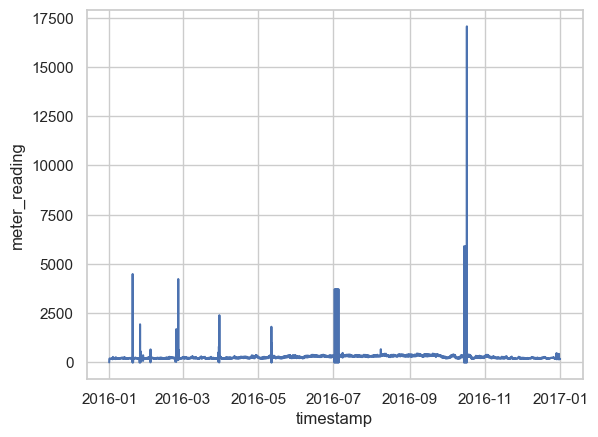

In [47]:
sns.lineplot(data=mtime, x=mtime.index, y='meter_reading')
plt.show()
plt.close()

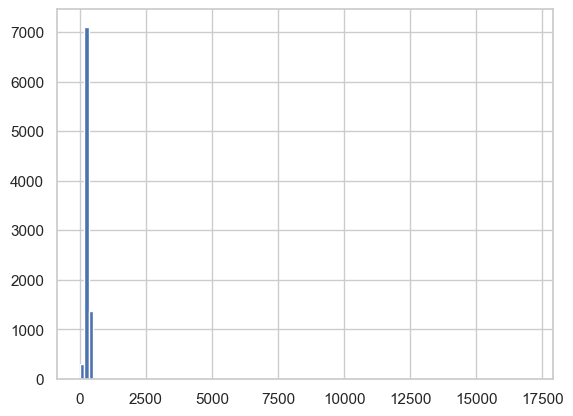

In [48]:
mtime['meter_reading'].hist(bins=100)
plt.show()
plt.close()

<Axes: xlabel='meter_reading', ylabel='Count'>

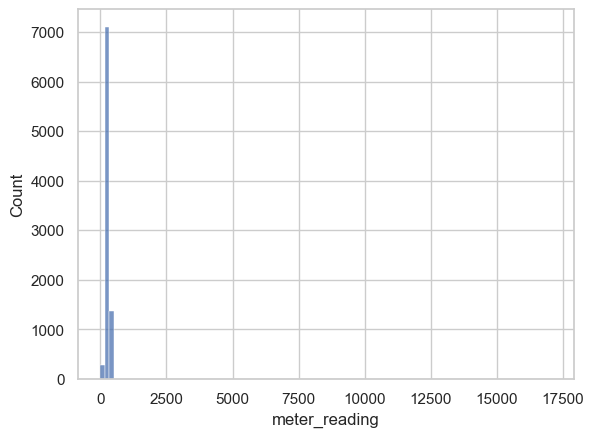

In [49]:
sns.histplot(data=mtime, x="meter_reading", bins=100)

<Axes: xlabel='meter_reading', ylabel='Count'>

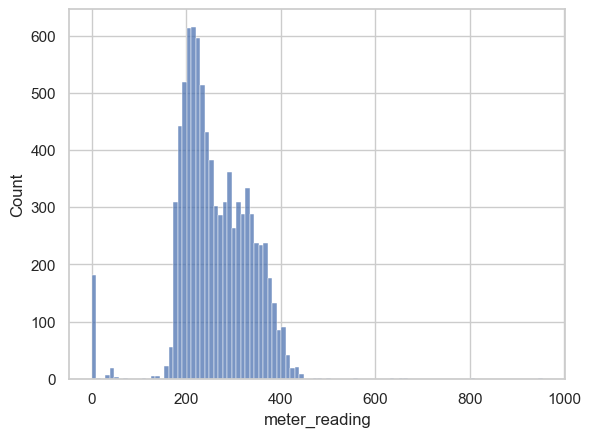

In [50]:
#Show histogram of meter_reading less than 1,0000
stime = mtime[mtime['meter_reading'] < 1000]
sns.histplot(data=stime, x="meter_reading", bins=100)

In [51]:
stime['meter_reading'].skew()

-0.2771462338958984

In [52]:
stime['meter_reading'].kurtosis()

2.6686593934488716

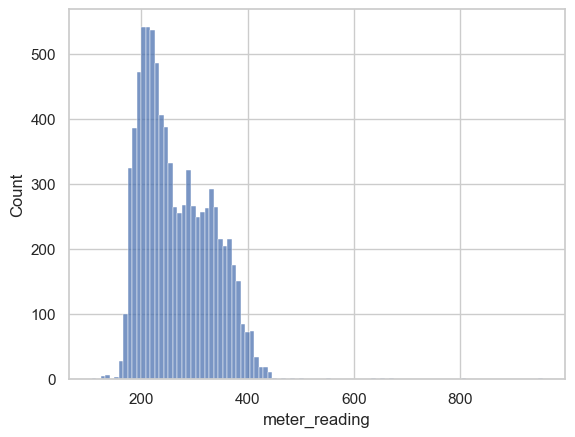

In [53]:
stime2 = stime[stime['meter_reading'] > 100]
#stime2['meter_reading'].hist(bins=100)
sns.histplot(data=stime2, x="meter_reading", bins=100)
plt.show()
plt.close()

In [54]:
stime2['meter_reading'].skew(),  stime2['meter_reading'].kurtosis()

(0.7365520823485558, 1.5286765194128615)

In [55]:
btime = mtime[mtime['meter_reading'] > 1000]
btime.describe()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,14.000000,14.000000,14.000000,12.0,14.000000,14.000000,14.000000,12.000000,14.000000
mean,4727.261623,152736.522192,24.085714,0.0,16.421429,-0.071429,1014.350000,105.833333,2.128571
std,3839.953314,10618.351258,8.061672,0.0,7.908046,0.267261,5.023598,98.114806,1.589595
min,1688.170597,138735.770270,6.700000,0.0,-1.100000,-1.000000,1008.100000,0.000000,0.000000
25%,2726.210880,145373.619835,18.500000,0.0,12.900000,0.000000,1011.475000,0.000000,0.375000
50%,3721.838778,152547.439411,25.250000,0.0,19.700000,0.000000,1013.150000,135.000000,2.600000
75%,5542.959976,152835.291667,31.225000,0.0,21.425000,0.000000,1015.725000,162.500000,3.600000
max,17065.982297,173950.708333,32.800000,0.0,23.900000,0.000000,1027.700000,300.000000,4.100000


In [56]:
mprimary = data.groupby(['primary_use']).mean(numeric_only = True)
mprimary

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
primary_use,,,,,,,,,
Education,292.515698,150734.880030,21.369107,0.611577,14.615865,0.749019,1016.627321,116.674824,2.083638
Entertainment/public assembly,309.884465,197272.571763,21.374755,0.611458,14.620396,0.749572,1016.624230,116.681698,2.083912
Lodging/residential,207.587695,130317.594113,21.384440,0.612545,14.633296,0.747239,1016.628595,116.590638,2.082423
Office,146.003855,94541.318928,21.367093,0.611511,14.613059,0.750978,1016.628056,116.666053,2.083537
Public services,316.750109,278778.744331,21.365933,0.611822,14.612647,0.751356,1016.628594,116.677312,2.083524
Services,94.768729,361068.370171,21.367493,0.612139,14.614262,0.748698,1016.628837,116.698679,2.083520


In [57]:
new_index=list(data['primary_use'].unique())

print(new_index)

['Office', 'Lodging/residential', 'Education', 'Entertainment/public assembly', 'Services', 'Public services']


In [58]:
mprimary=mprimary.reindex(new_index)
mprimary

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
primary_use,,,,,,,,,
Office,146.003855,94541.318928,21.367093,0.611511,14.613059,0.750978,1016.628056,116.666053,2.083537
Lodging/residential,207.587695,130317.594113,21.384440,0.612545,14.633296,0.747239,1016.628595,116.590638,2.082423
Education,292.515698,150734.880030,21.369107,0.611577,14.615865,0.749019,1016.627321,116.674824,2.083638
Entertainment/public assembly,309.884465,197272.571763,21.374755,0.611458,14.620396,0.749572,1016.624230,116.681698,2.083912
Services,94.768729,361068.370171,21.367493,0.612139,14.614262,0.748698,1016.628837,116.698679,2.083520
Public services,316.750109,278778.744331,21.365933,0.611822,14.612647,0.751356,1016.628594,116.677312,2.083524


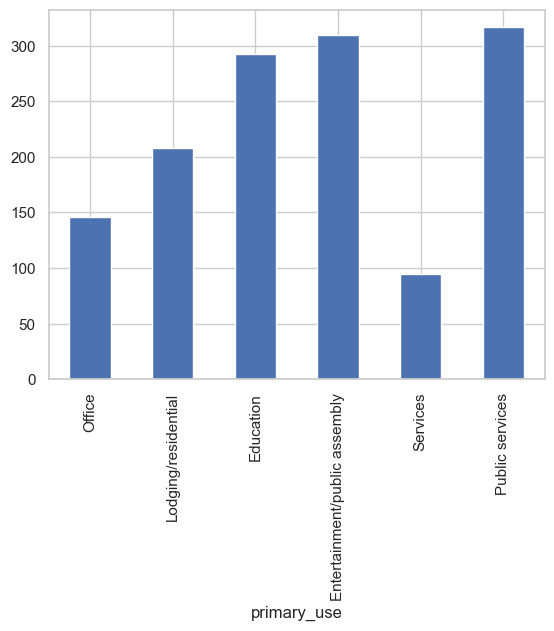

In [59]:
mprimary['meter_reading'].plot.bar(grid=True)
plt.show()
plt.close()

C:\Users\eraco\AppData\Local\Temp\ipykernel_23124\1459565847.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  g.legend(loc='upper right', bbox_to_anchor=(1.7,1))


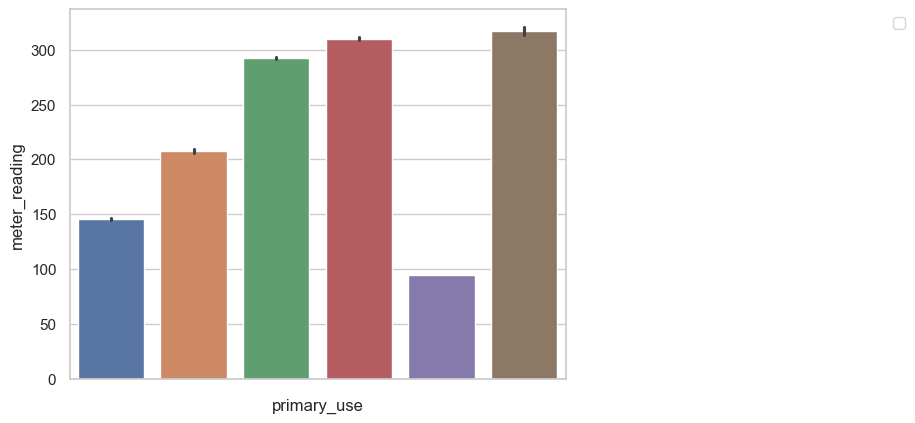

In [60]:
g=sns.barplot(data=data, x="primary_use",y="meter_reading", hue="primary_use", dodge=False)
g.set(xticklabels=[])  # remove the tick labels
g.legend(loc='upper right', bbox_to_anchor=(1.7,1))
plt.show()
plt.close()

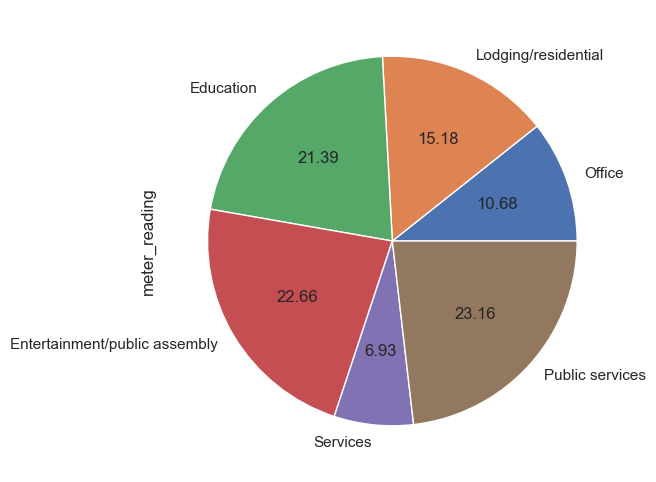

In [61]:
#autopct enables you to display the percent value using Python string formatting.
mprimary['meter_reading'].plot.pie(figsize=(6, 6),  autopct='%.2f')
plt.show()

In [62]:
mbuilding = data.groupby(['building_id']).mean(numeric_only = True)

C:\Users\eraco\AppData\Local\Temp\ipykernel_23124\3773442812.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mbuilding = data.groupby(['building_id']).mean(numeric_only = True)


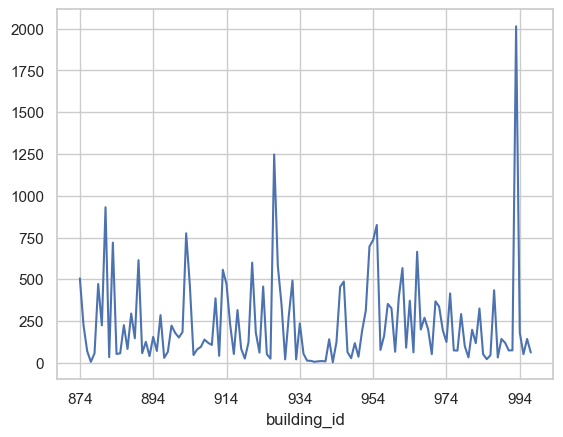

In [68]:
mbuilding['meter_reading'].plot()
plt.show()
#Can we try bar plot?

In [69]:
mbuilding['meter_reading'].idxmax(), mbuilding['meter_reading'].max()

(993, 2014.5993930662617)

In [70]:
mbuilding.head()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
building_id,,,,,,,,,
874,505.989624,181805.0,21.363869,0.611995,14.611186,0.756752,1016.628881,116.692704,2.083304
875,224.287998,177708.0,21.366104,0.611467,14.612929,0.752806,1016.627920,116.685803,2.083504
876,70.154146,55240.0,21.366910,0.611477,14.613205,0.756220,1016.627304,116.673640,2.083464
877,6.376783,8004.0,21.369961,0.612022,14.616686,0.746971,1016.628516,116.666667,2.083545
878,57.280178,41241.0,21.675800,0.629718,14.973245,0.737101,1016.622826,115.076981,2.061221


In [71]:
mbuilding.loc[993]

meter_reading           2014.599393
square_feet           428647.000000
air_temperature           21.370731
cloud_coverage             0.610700
dew_temperature           14.615641
precip_depth_1_hr          0.745305
sea_level_pressure      1016.627290
wind_direction           116.674350
wind_speed                 2.083643
Name: 993, dtype: float64

In [72]:
#Exercise
#What's the primary_use of 993 building?
data['primary_use'].loc[993]

'Entertainment/public assembly'

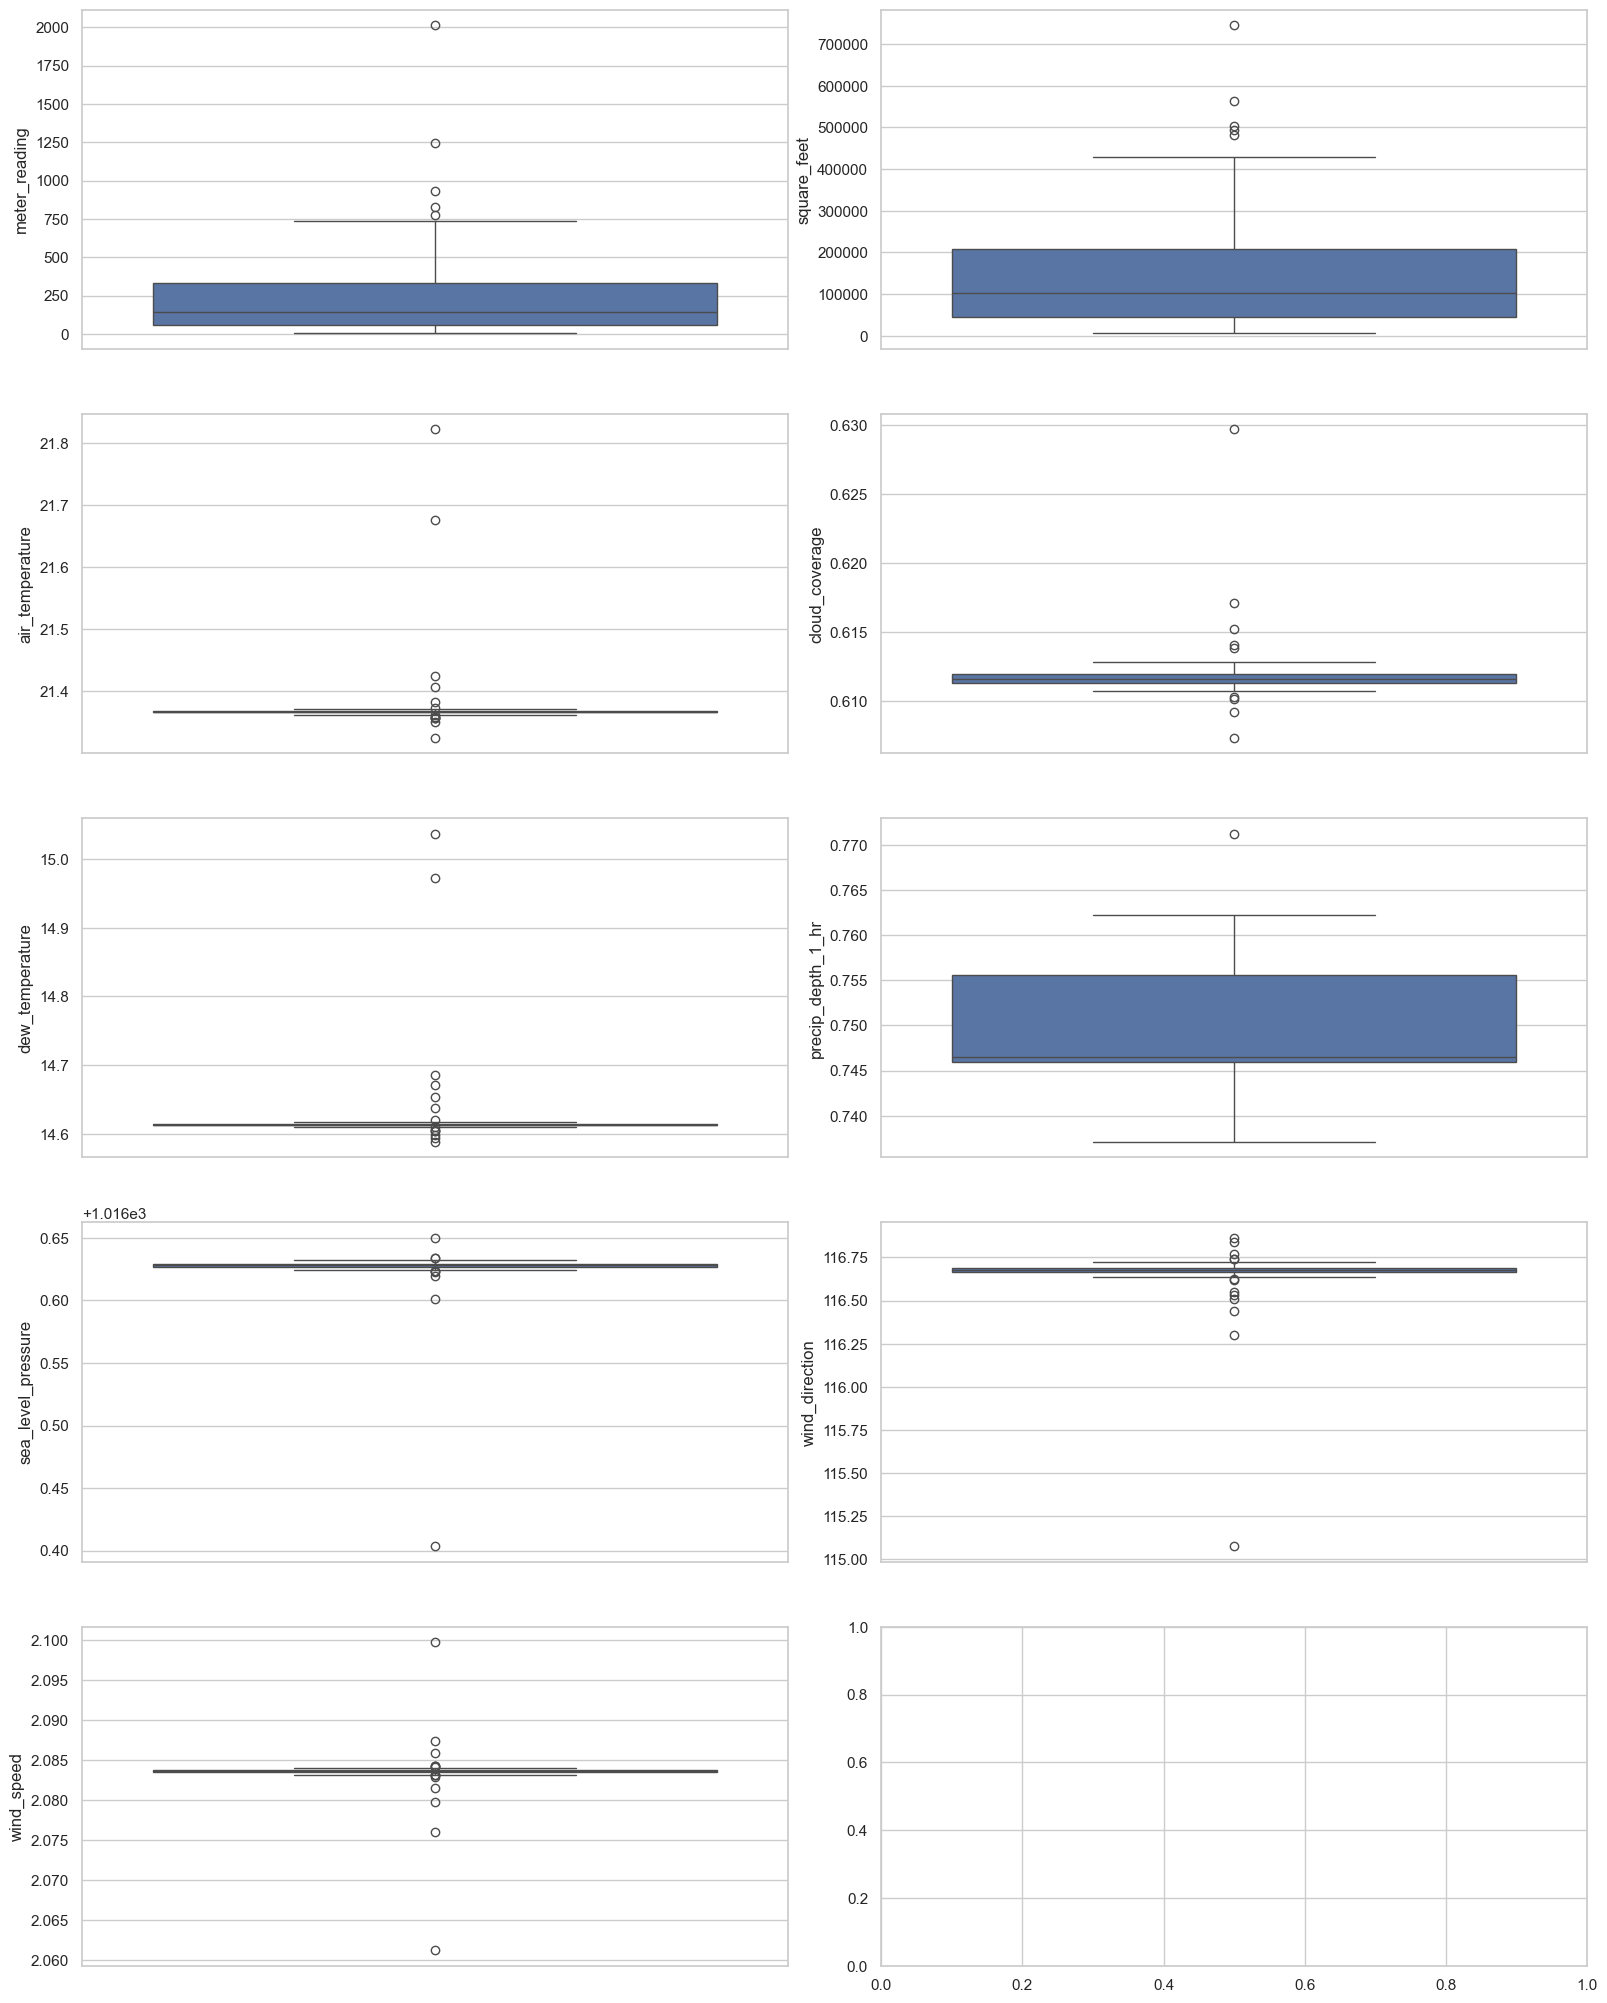

In [73]:
# plot box plot of all candidate features
features = list(mbuilding.columns)
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(16, 20))
index = 0
axs = axs.flatten()

for k in features:
    sns.boxplot(y=k, data=mbuilding, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)
plt.show()

### Resample time-series data.
The object must have a datetime-like index

In terms of date ranges, the following is a table for common time period options when resampling a time series:
<br>
Alias	Description

* B	Business day
* D	Calendar day
* W	Weekly
* M	Month end
* Q	Quarter end
* A	Year end
* BA	Business year end
* AS	Year start
* H	Hourly frequency
* T, min	Minutely frequency
* S	Secondly frequency
* L, ms	Millisecond frequency
* U, us	Microsecond frequency
* N, ns	Nanosecond frequency


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2679323 entries, 0 to 2679322
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   building_id         category      
 2   meter               category      
 3   meter_reading       float64       
 4   primary_use         object        
 5   square_feet         int64         
 6   air_temperature     float64       
 7   cloud_coverage      float64       
 8   dew_temperature     float64       
 9   precip_depth_1_hr   float64       
 10  sea_level_pressure  float64       
 11  wind_direction      float64       
 12  wind_speed          float64       
dtypes: category(2), datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 250.4+ MB


In [75]:
data.set_index(['timestamp'], inplace=True) #Set 'timestamp' as index of DataFrame

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2679323 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 12 columns):
 #   Column              Dtype   
---  ------              -----   
 0   building_id         category
 1   meter               category
 2   meter_reading       float64 
 3   primary_use         object  
 4   square_feet         int64   
 5   air_temperature     float64 
 6   cloud_coverage      float64 
 7   dew_temperature     float64 
 8   precip_depth_1_hr   float64 
 9   sea_level_pressure  float64 
 10  wind_direction      float64 
 11  wind_speed          float64 
dtypes: category(2), float64(8), int64(1), object(1)
memory usage: 230.0+ MB


In [77]:
data.head()

,building_id,meter,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,,,,
2016-01-01,874,0,0.0,Office,181805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,874,1,0.0,Office,181805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,875,0,0.0,Lodging/residential,177708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,875,1,0.0,Lodging/residential,177708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,875,2,0.0,Lodging/residential,177708,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#set datetime index to the data
#data['Time'] = data.timestamp #data['timestamp']
#data.set_index(['Time'], inplace=True) #Set Time as index of DataFrame
#data.drop(['timestamp'], inplace=True, axis=1)

In [78]:
#Resample time-series data.
# date ranges: W Weekly
pm = data.resample('W').mean(numeric_only=True)
pm['meter_reading'] = pm['meter_reading']/max(pm['meter_reading'])  #normalize (0 to 1)
pm['air_temperature'] = pm['air_temperature']/max(pm['air_temperature']) #normalize (0 to 1)
pm['wind_speed'] = pm['wind_speed']/max(pm['wind_speed']) #normalize (0 to 1)

In [79]:
pm.head()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,
2016-01-03,0.488554,154360.379572,0.255567,1.332603,2.208405,0.590831,1029.677226,152.691264,0.669376
2016-01-10,0.545345,154383.458354,0.303103,0.648246,4.138936,0.137027,1019.157056,129.329727,0.485871
2016-01-17,0.565514,154122.358514,0.321919,0.266836,2.609192,-0.024701,1018.459794,91.908748,0.357109
2016-01-24,0.557028,153967.155936,0.306246,0.321113,2.853949,0.006022,1022.444123,146.377313,0.573538
2016-01-31,0.515095,154019.515031,0.434854,0.296585,3.944768,-0.011958,1017.615475,135.526175,0.700027


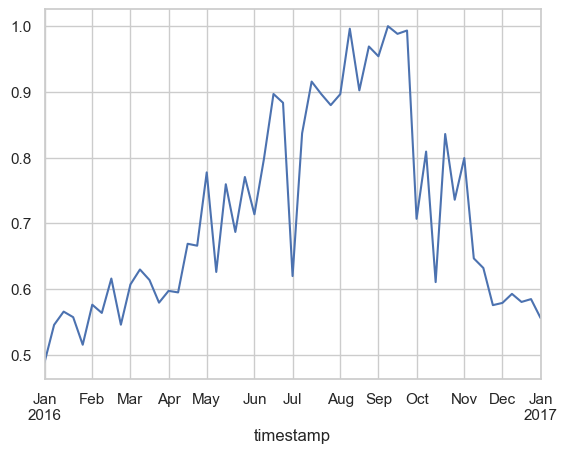

In [80]:
pm['meter_reading'].plot()
plt.show()

In [81]:
#meter - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, 3: hotwater}.
meter1 = data[data['meter'] == 1]
meter1_res = meter1[meter1['primary_use'] == 'Lodging/residential']
meter1_res_1e5 = meter1_res[meter1_res['square_feet'] < 1e5]

In [82]:
meter1_res_1e5 = meter1_res_1e5[meter1_res_1e5['meter_reading'] > 0]

In [83]:
meter1mean = meter1_res_1e5.resample('H').mean(numeric_only=True)

C:\Users\eraco\AppData\Local\Temp\ipykernel_23124\867103660.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  meter1mean = meter1_res_1e5.resample('H').mean(numeric_only=True)


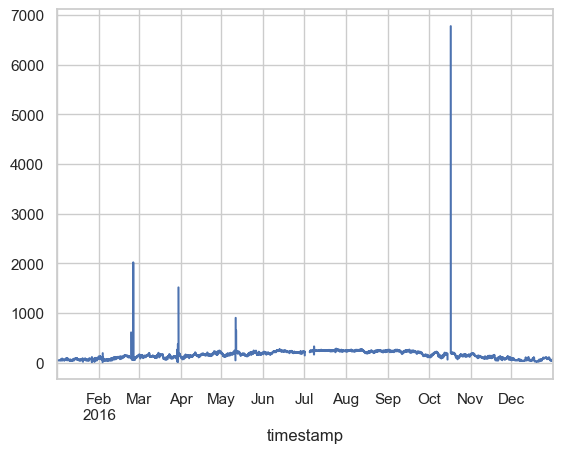

In [84]:
meter1mean['meter_reading'].plot()
plt.show()

In [90]:
meter1mean.columns

Index(['meter_reading', 'square_feet', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

In [86]:
# Try to find out what cause the Oct-Nov peak?
# You can set up a hypothesis on the possible features that could impact the peak and try to confirm using plot and descriptive statistics

# If we plot the correlation between features (by looking to feature meter_reading), it can be seen that air_temperature and dew_temperature has most correlation
# So we can suppose that the increase of air_temperature and dew_temperature would lead to the increase of meter_reading
# Air Temperature: Changes in air temperature might lead to increased heating or cooling demands, impacting the meter readings.
# Dew Temperature: Similar to air temperature, dew temperature can indicate humidity levels, potentially affecting HVAC usage.

# To confirm our hypthothesis let's proceed with some statistics and visualization
meter1mean.corr()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter_reading,1.000000,-0.318453,0.452309,0.103544,0.456876,0.000190,-0.280476,-0.029271,0.036131
square_feet,-0.318453,1.000000,-0.130463,0.002555,-0.113337,-0.014319,0.132868,-0.005402,0.007493
air_temperature,0.452309,-0.130463,1.000000,0.202356,0.792930,-0.031639,-0.557605,0.014375,0.183799
cloud_coverage,0.103544,0.002555,0.202356,1.000000,0.285134,0.079736,-0.176361,-0.003034,0.067387
dew_temperature,0.456876,-0.113337,0.792930,0.285134,1.000000,0.043631,-0.613485,-0.128481,-0.002173
precip_depth_1_hr,0.000190,-0.014319,-0.031639,0.079736,0.043631,1.000000,-0.051025,0.028415,0.027782
sea_level_pressure,-0.280476,0.132868,-0.557605,-0.176361,-0.613485,-0.051025,1.000000,-0.024552,-0.121592
wind_direction,-0.029271,-0.005402,0.014375,-0.003034,-0.128481,0.028415,-0.024552,1.000000,0.603610
wind_speed,0.036131,0.007493,0.183799,0.067387,-0.002173,0.027782,-0.121592,0.603610,1.000000


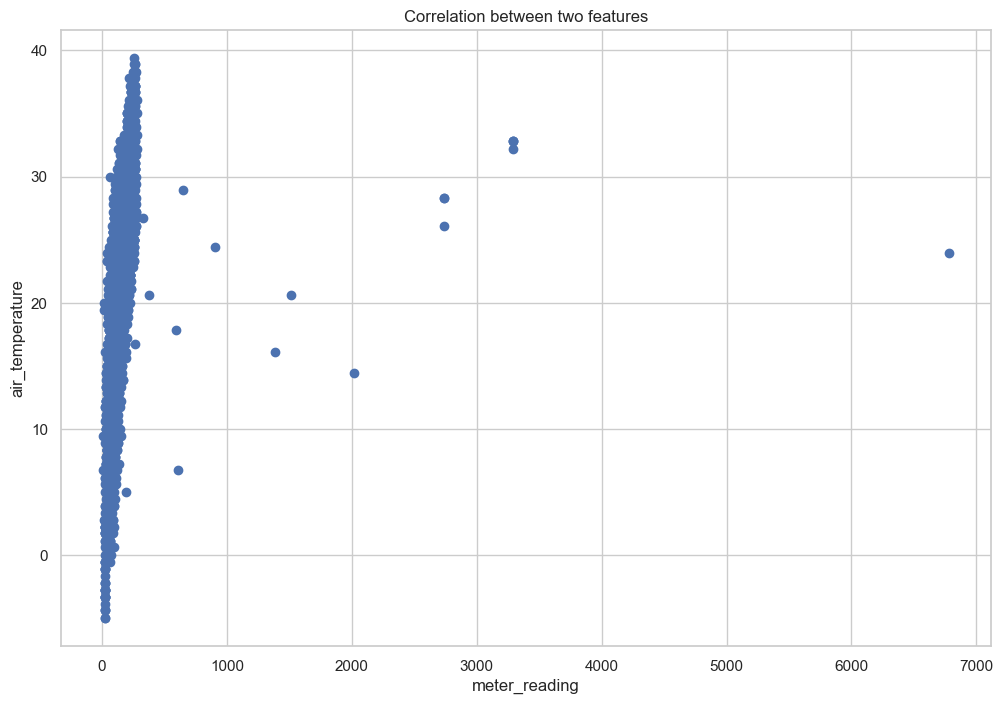

In [88]:
plt.figure(figsize=(12, 8))

plt.scatter(meter1mean['meter_reading'], meter1mean['air_temperature'])
plt.title("Correlation between two features")
plt.xlabel("meter_reading")
plt.ylabel("air_temperature")
plt.show()

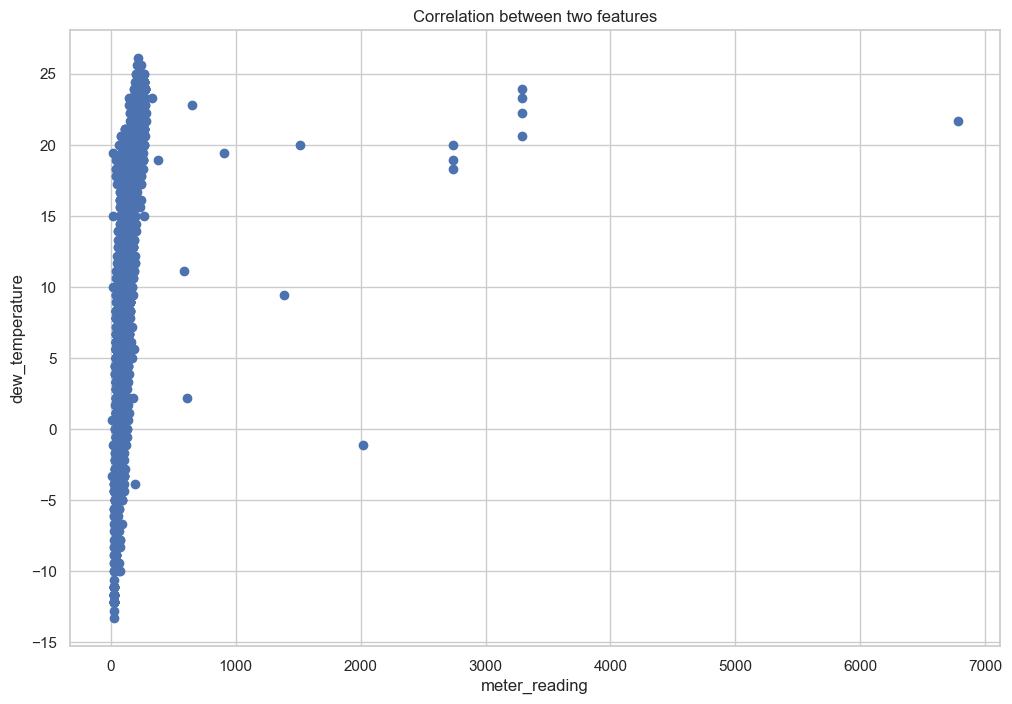

In [89]:
plt.figure(figsize=(12, 8))

plt.scatter(meter1mean['meter_reading'], meter1mean['dew_temperature'])
plt.title("Correlation between two features")
plt.xlabel("meter_reading")
plt.ylabel("dew_temperature")
plt.show()

In [92]:
# Now let's take data only in Oct-Nov months

oct_nov_data = meter1mean[(meter1mean.index.month == 10) | (meter1mean.index.month == 11)]
oct_nov_data.describe()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1411.000000,1411.000000,1411.000000,928.000000,1411.000000,1411.000000,1381.000000,1012.000000,1401.000000
mean,139.893153,51676.265090,20.915734,0.487069,14.565627,0.364989,1018.598697,86.363636,1.571306
std,217.378598,476.551188,5.595962,1.293017,5.818696,4.131957,5.925326,115.929214,1.369235
min,44.892587,43173.000000,2.200000,0.000000,-3.300000,-1.000000,999.500000,0.000000,0.000000
25%,100.904267,51664.333333,17.200000,0.000000,11.700000,0.000000,1015.200000,0.000000,0.000000
50%,127.552344,51664.333333,21.100000,0.000000,15.600000,0.000000,1019.500000,10.000000,1.500000
75%,157.019433,51664.333333,25.000000,0.000000,18.900000,0.000000,1022.200000,160.000000,2.600000
max,6779.330000,53166.250000,33.300000,9.000000,23.300000,84.000000,1037.200000,360.000000,7.200000


In [93]:
# Air Temperature (0.166) and Dew Temperature (0.184) show a positive correlation with meter readings, indicating that as temperatures rise, meter readings tend to increase. 
# This might be due to increased cooling demands in warmer periods within October-November.

oct_nov_data.corr()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter_reading,1.000000,-0.782893,0.166607,0.040155,0.184373,-0.005317,-0.123829,0.004644,0.025855
square_feet,-0.782893,1.000000,-0.140268,-0.006014,-0.141171,0.001504,0.116107,-0.016125,-0.016269
air_temperature,0.166607,-0.140268,1.000000,0.183294,0.592448,-0.015220,-0.471946,0.139685,0.366850
cloud_coverage,0.040155,-0.006014,0.183294,1.000000,0.285415,-0.024750,-0.111418,0.050174,0.145262
dew_temperature,0.184373,-0.141171,0.592448,0.285415,1.000000,0.070259,-0.363123,-0.107061,0.099720
precip_depth_1_hr,-0.005317,0.001504,-0.015220,-0.024750,0.070259,1.000000,-0.003137,0.028679,0.031701
sea_level_pressure,-0.123829,0.116107,-0.471946,-0.111418,-0.363123,-0.003137,1.000000,-0.119657,-0.163802
wind_direction,0.004644,-0.016125,0.139685,0.050174,-0.107061,0.028679,-0.119657,1.000000,0.658904
wind_speed,0.025855,-0.016269,0.366850,0.145262,0.099720,0.031701,-0.163802,0.658904,1.000000


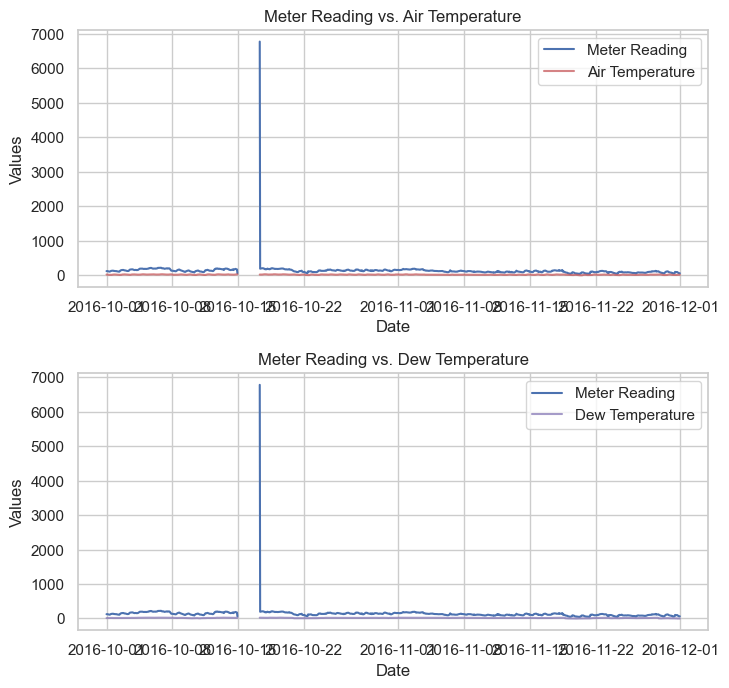

In [98]:
plt.figure(figsize=(14, 10))

# Plot meter readings with air temperature
plt.subplot(3, 2, 1)
plt.plot(oct_nov_data.index, oct_nov_data['meter_reading'], label='Meter Reading', color='b')
plt.plot(oct_nov_data.index, oct_nov_data['air_temperature'], label='Air Temperature', color='r', alpha=0.7)
plt.title('Meter Reading vs. Air Temperature')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Plot meter readings with dew temperature
plt.subplot(3, 2, 3)
plt.plot(oct_nov_data.index, oct_nov_data['meter_reading'], label='Meter Reading', color='b')
plt.plot(oct_nov_data.index, oct_nov_data['dew_temperature'], label='Dew Temperature', color='m', alpha=0.7)
plt.title('Meter Reading vs. Dew Temperature')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

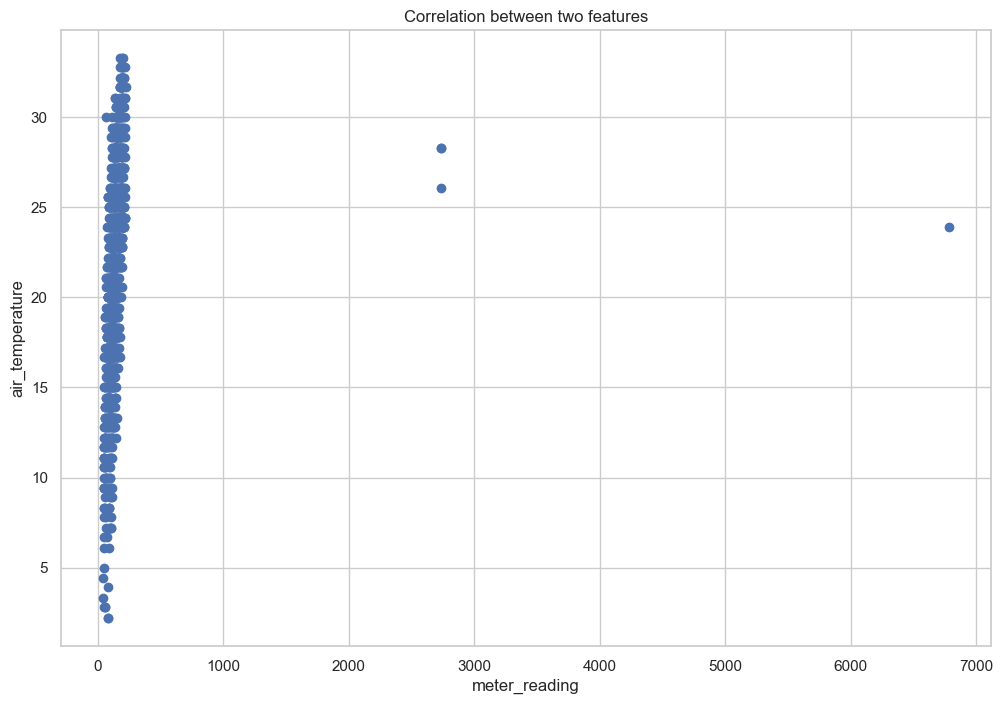

In [112]:
plt.figure(figsize=(12, 8))

plt.scatter(oct_nov_data['meter_reading'], oct_nov_data['air_temperature'])
plt.title("Correlation between two features")
plt.xlabel("meter_reading")
plt.ylabel("air_temperature")
plt.show()

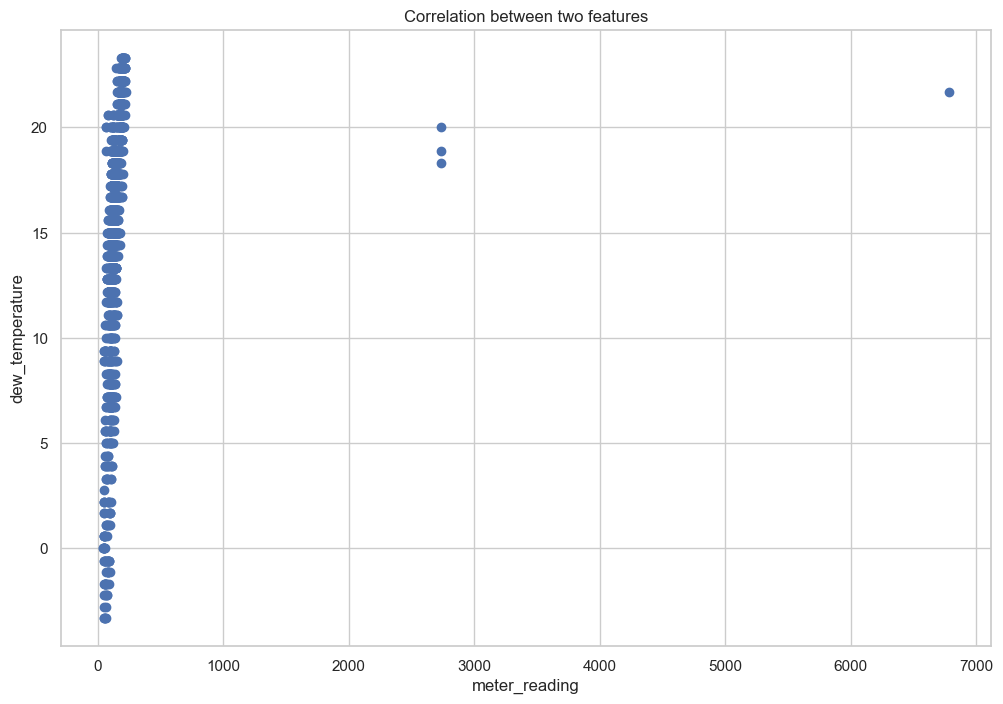

In [99]:
plt.figure(figsize=(12, 8))

plt.scatter(oct_nov_data['meter_reading'], oct_nov_data['dew_temperature'])
plt.title("Correlation between two features")
plt.xlabel("meter_reading")
plt.ylabel("dew_temperature")
plt.show()

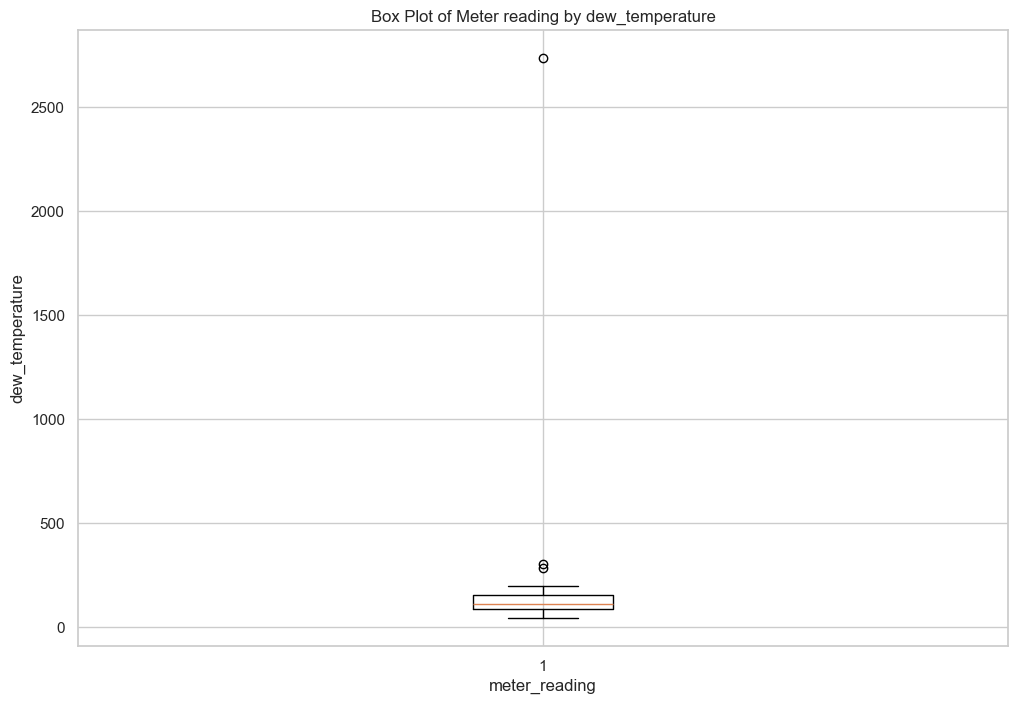

In [113]:
plt.figure(figsize=(12, 8))

data = oct_nov_data.groupby('air_temperature').meter_reading.mean()

plt.boxplot(data)
plt.title("Box Plot of Meter reading by dew_temperature")
plt.xlabel("meter_reading")
plt.ylabel("dew_temperature")
plt.show()

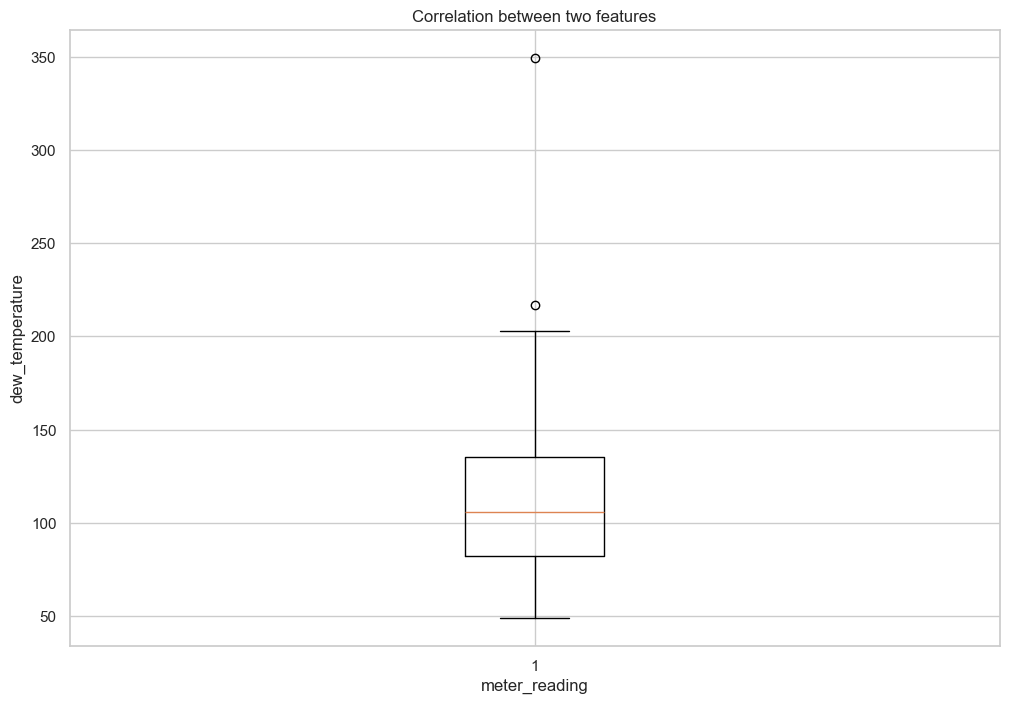

In [110]:
plt.figure(figsize=(12, 8))

data = oct_nov_data.groupby('dew_temperature').meter_reading.mean()

plt.boxplot(data)
plt.title("Box Plot of Meter reading by dew_temperature")
plt.xlabel("meter_reading")
plt.ylabel("dew_temperature")
plt.show()

The observed peak in meter readings during October-November can be resulted because of varying air and dew temperatures, which impact heating and cooling needs. Although cloud coverage, precipitation, and wind conditions play minor roles, temperature fluctuations are likely the primary drivers. The analysis confirms that environmental factors are influencing energy consumption during this period, aligning with the initial hypothesis.